In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable("W1", shape=[784, 512],
                    initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                    initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                    initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                    initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
for epoch in range(num_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    feed_dict = {X: batch_xs, Y: batch_ys}
    c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
    avg_cost += c / total_batch
  
  print('Epoch: ', '%04d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch:  0001 cost =  0.296600242
Epoch:  0002 cost =  0.106303462
Epoch:  0003 cost =  0.070163584
Epoch:  0004 cost =  0.053407148
Epoch:  0005 cost =  0.040954058
Epoch:  0006 cost =  0.038665383
Epoch:  0007 cost =  0.030955290
Epoch:  0008 cost =  0.026210720
Epoch:  0009 cost =  0.021660937
Epoch:  0010 cost =  0.022793489
Epoch:  0011 cost =  0.019067575
Epoch:  0012 cost =  0.016449365
Epoch:  0013 cost =  0.015976897
Epoch:  0014 cost =  0.018956556
Epoch:  0015 cost =  0.013697135
Epoch:  0016 cost =  0.014898783
Epoch:  0017 cost =  0.012242168
Epoch:  0018 cost =  0.012373675
Epoch:  0019 cost =  0.012903692
Epoch:  0020 cost =  0.010874953
Epoch:  0021 cost =  0.015387651
Epoch:  0022 cost =  0.010642285
Epoch:  0023 cost =  0.007187540
Epoch:  0024 cost =  0.011683016
Epoch:  0025 cost =  0.011605252
Epoch:  0026 cost =  0.009851342
Epoch:  0027 cost =  0.005896163
Epoch:  0028 cost =  0.008681340
Epoch:  0029 cost =  0.008367593
Epoch:  0030 cost =  0.010132753
Epoch:  00

Label:  [0]
Prediction:  [0]


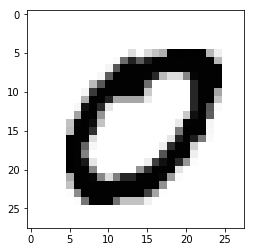

In [0]:
r = random.randint(0, mnist.test.num_examples - 1)

print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
print(
    "Prediction: ",
    sess.run(
        tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}
    ),
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()